In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
parlimen_df = pd.read_csv('GE_Parliament_Data.csv')
dun_df = pd.read_csv('GE_Dun_Data.csv')

In [4]:
parlimen_df['Constitution'] = 'PARLIMEN'
dun_df['Constitution'] = 'DUN'
candidates_df = pd.concat([parlimen_df,dun_df])

In [5]:
def individual_election_history_plot(candidates_df,candidate_name,rotation_deg=30):
    candidate1 = candidates_df
    name_keywords = candidate_name.split(' ')
    for name_keyword in name_keywords:
        candidate1 = candidate1[candidate1.Name.str.contains(name_keyword,case=False)]
    candidate1 = candidate1.sort_values(by=['year']).reset_index(drop=True)
    # exit
    if candidate1.shape[0]==0:
        print('Name not found')
        return None
    # step 2
    competition1 = pd.DataFrame()
    for row_no in range(candidate1.shape[0]):
        df = candidates_df[(candidates_df.year==candidate1.year[row_no]) &
                          (candidates_df.ParliamentCode==candidate1.ParliamentCode[row_no]) &
                          (candidates_df.type==candidate1.type[row_no]) &
                          (candidates_df.Constitution==candidate1.Constitution[row_no]) &
                          (candidates_df.SeatName==candidate1.SeatName[row_no])]
        competition1 = pd.concat([competition1,df])
    competition1.reset_index(drop=True,inplace=True)
#     return competition1
    # step 3
    constitution = np.sort(competition1.Constitution.unique())
    
    for con in constitution:
        print(con)
        con_df = competition1[competition1.Constitution==con]
        years = np.sort(con_df.year.unique())
        
        fig, ax = plt.subplots(len(years), 1,figsize=(12,3*len(years)), facecolor='white')
        for i in range(len(years)):
            df = con_df[con_df.year==years[i]]
            df.reset_index(drop=True,inplace=True)
            
            Names = [df.Name[x][:15]+'\n'+df.Party[x][:15] for x in range(df.shape[0])]
            if len(years)>1:
                ax[i].bar(df.Name, df.Votes, width=0.4)
                ax[i].title.set_text(df.SeatName[0]+'\n'+df.Event[0])
                ax[i].set_xticklabels(Names,rotation=rotation_deg)
            else:
                ax.bar(df.Name, df.Votes)
                ax.title.set_text(df.SeatName[0]+'\n'+df.Event[0])
                ax.set_xticklabels(Names,rotation=rotation_deg)

        fig.tight_layout()
        plt.savefig('plots/'+'_'.join(name_keywords)+'_'+con+'.png')
        plt.show()

PICKING ANUAR IBRAHIM

PARLIMEN


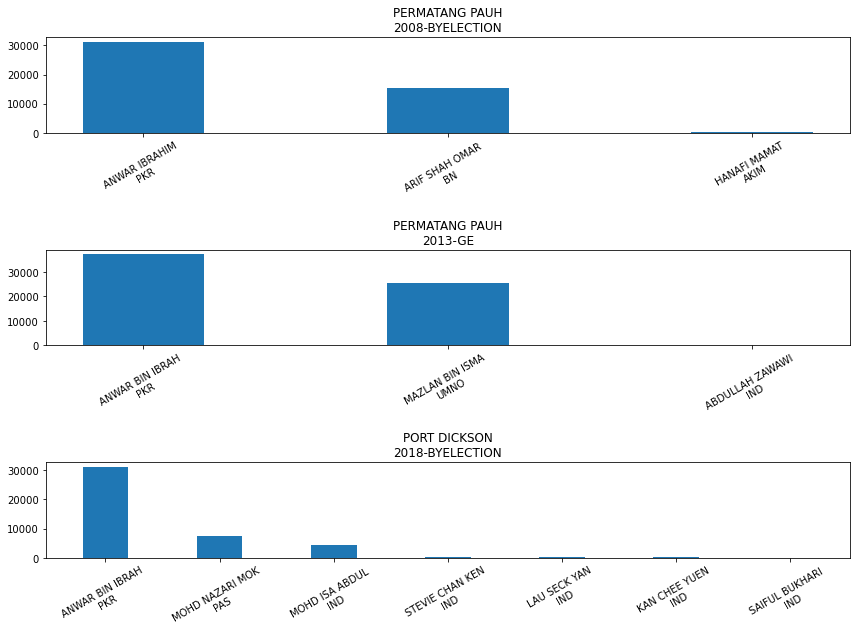

In [6]:
individual_election_history_plot(parlimen_df,'anwar ibrahim')

PICKING PEJA

DUN


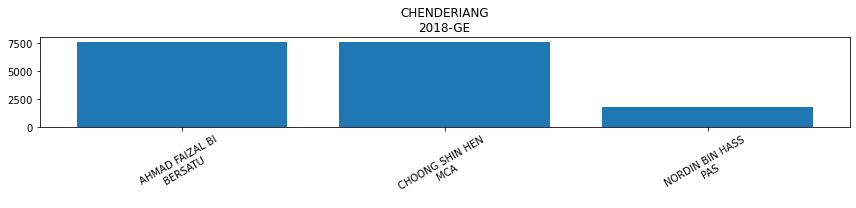

PARLIMEN


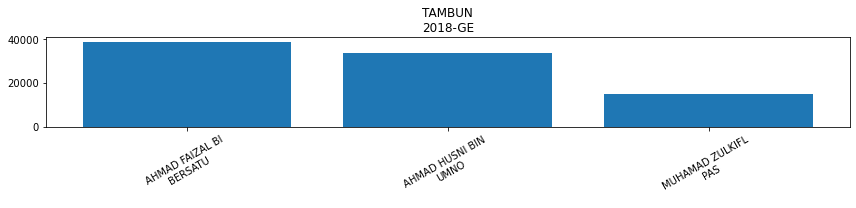

In [7]:
individual_election_history_plot(candidates_df,'faizal azumu')

PARLIMEN


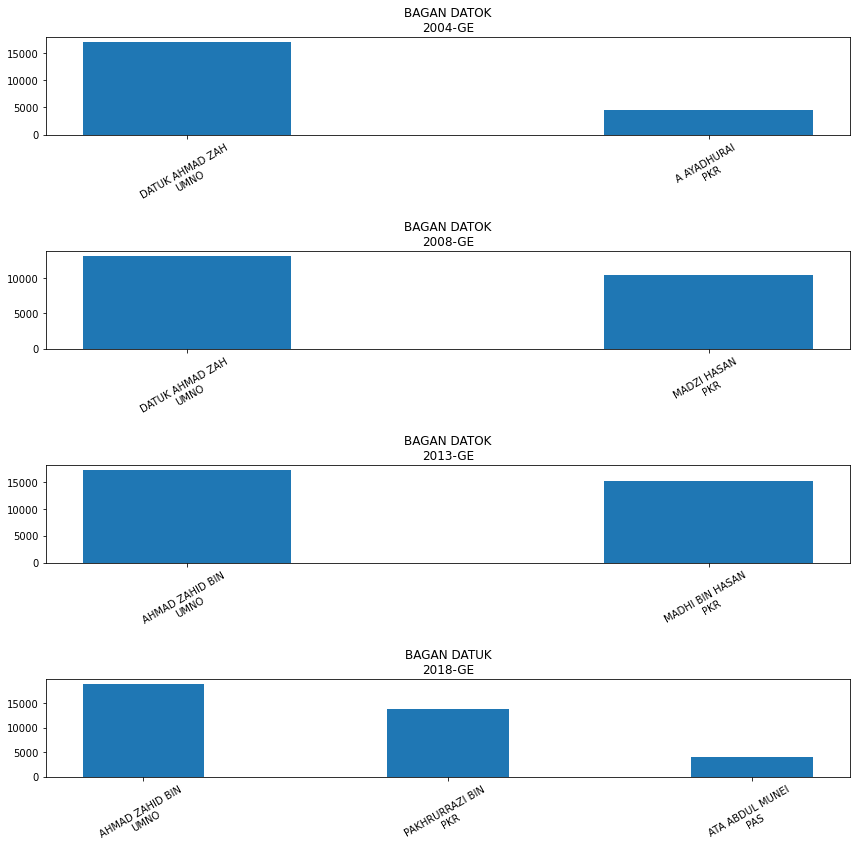

In [8]:
individual_election_history_plot(candidates_df,'ahmad zahid hamidi')

PARLIMEN


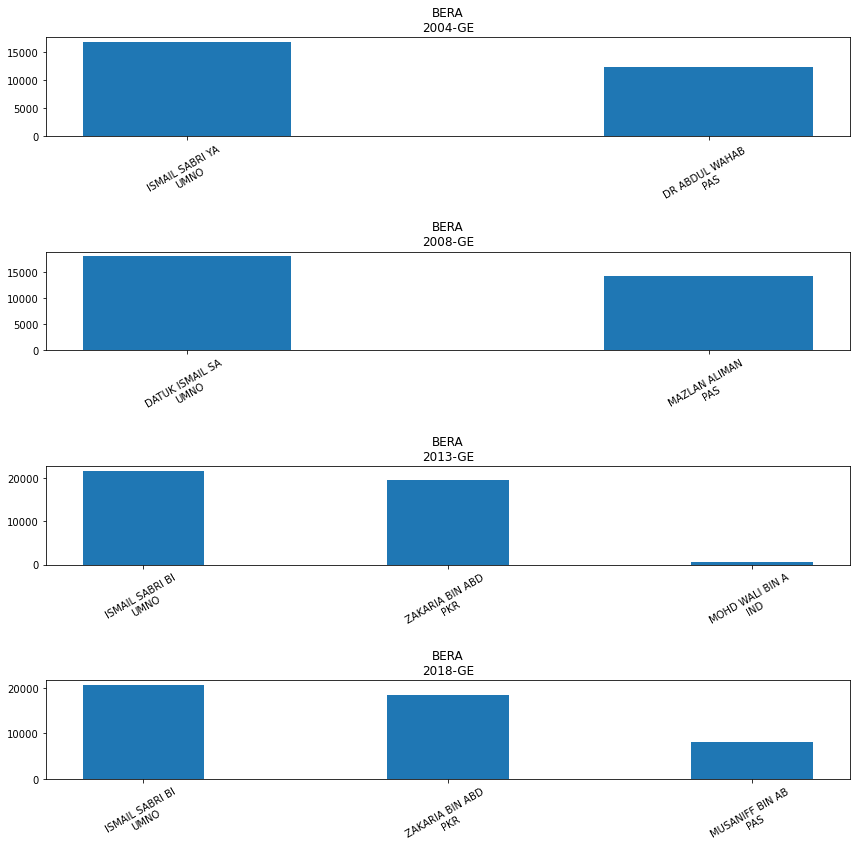

In [9]:
individual_election_history_plot(candidates_df,'ismail sabri')

PARLIMEN


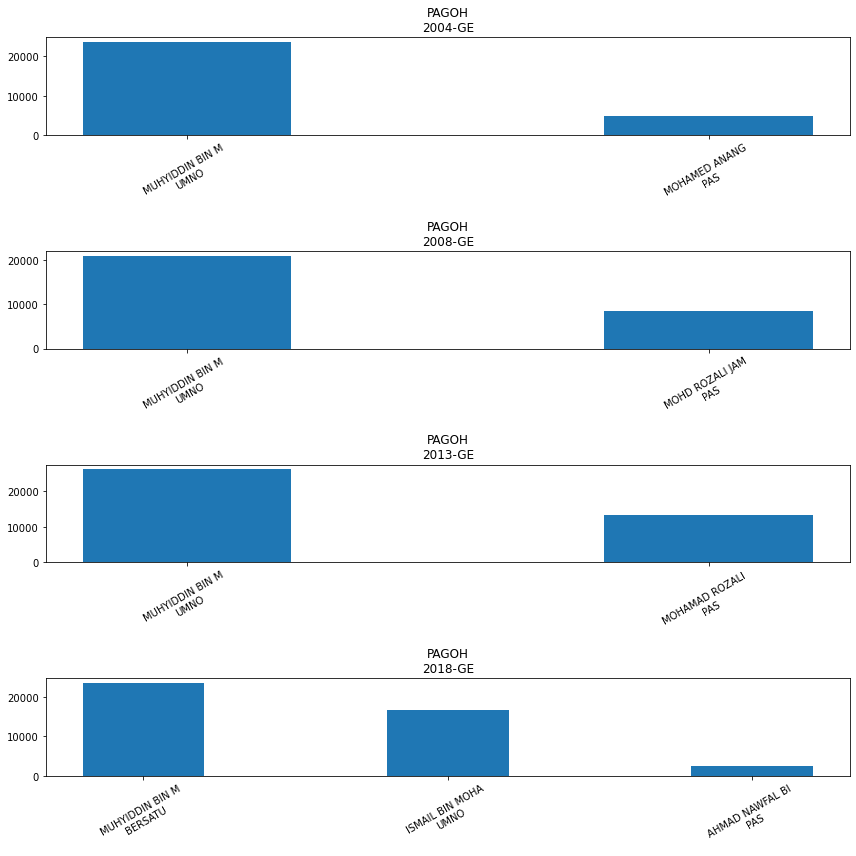

In [10]:
individual_election_history_plot(candidates_df,'muhyiddin yassin')

PARLIMEN


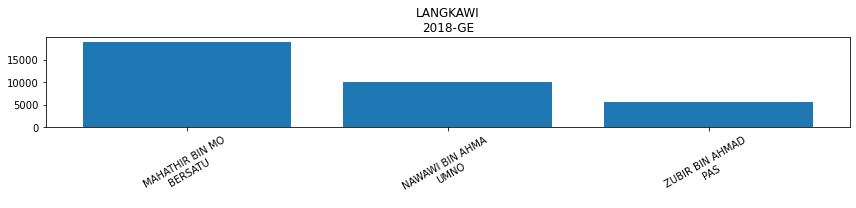

In [11]:
individual_election_history_plot(candidates_df,'mahathir mohamad')

PARLIMEN


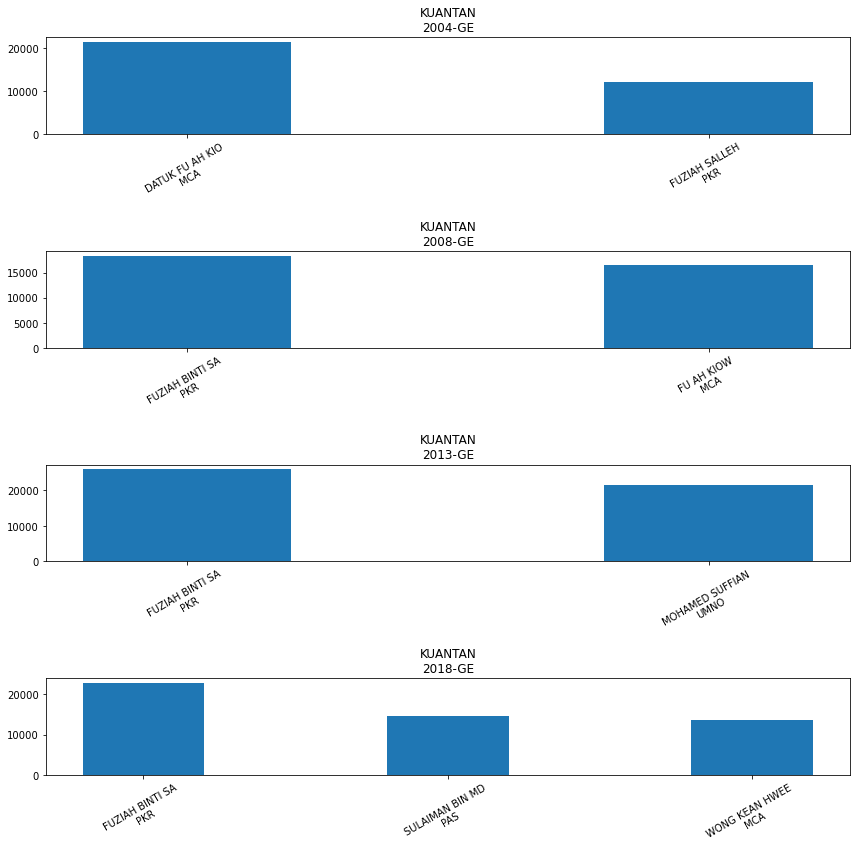

In [12]:
individual_election_history_plot(candidates_df,'fuziah salleh')

DUN


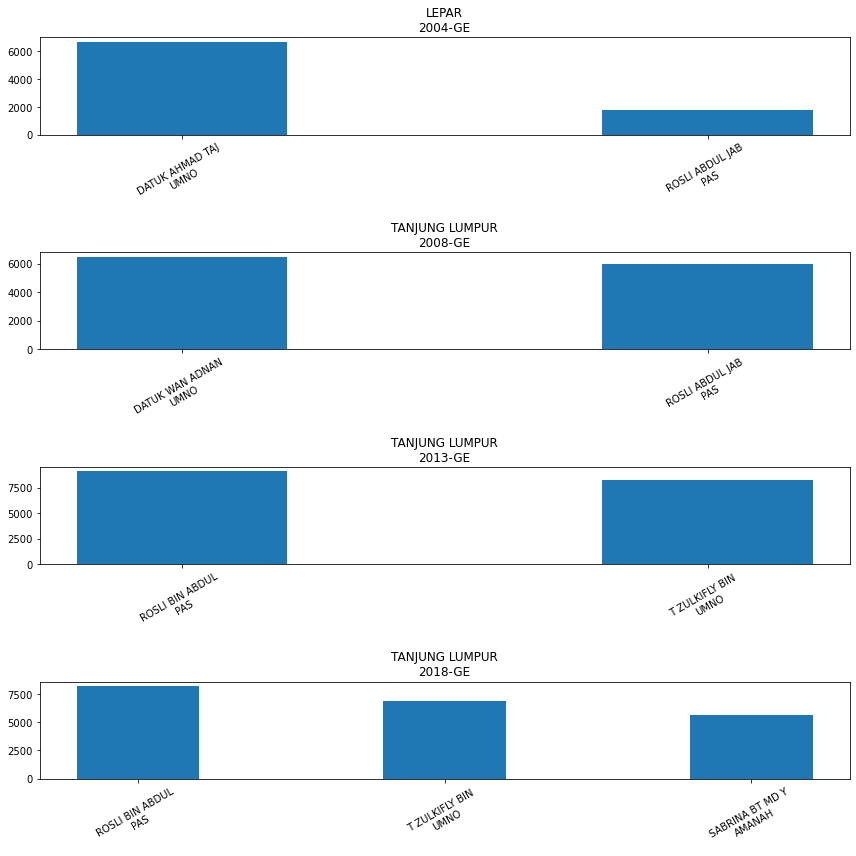

In [13]:
individual_election_history_plot(candidates_df,'rosli abdul jabar')